In [0]:
install.packages("sqldf")
require(sqldf)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘blob’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’




In [0]:
install.packages("dplyr") #for ddply function
require(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
install.packages("e1071") #for skewness function

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library(plyr) #for ddply function
library(reshape2)
library(e1071) #for skewness function

In [0]:
crashes <- read.csv('/content/crashes.csv')
head(crashes)

,Year,Road,N_Crashes,Volume
,<int>,<fct>,<int>,<int>
1,1991,Interstate 65,25,40000
2,1992,Interstate 65,37,41000
3,1993,Interstate 65,45,45000
4,1994,Interstate 65,46,45600
5,1995,Interstate 65,46,49000
6,1996,Interstate 65,59,51000


In [0]:
tail(crashes)

,Year,Road,N_Crashes,Volume
,<int>,<fct>,<int>,<int>
105,2007,Interstate 275,32,21900
106,2008,Interstate 275,21,21850
107,2009,Interstate 275,25,22100
108,2010,Interstate 275,24,21500
109,2011,Interstate 275,23,20300
110,2012,Interstate 275,22,21200


## **Visualizing Crashes Data**

In [0]:
summary(crashes)

      Year                  Road      N_Crashes          Volume      
 Min.   :1991   Interstate 275:22   Min.   : 21.00   Min.   : 18000  
 1st Qu.:1996   Interstate 65 :22   1st Qu.: 32.25   1st Qu.: 23200  
 Median :2002   Interstate 70 :22   Median : 52.00   Median : 47500  
 Mean   :2002   US-36         :22   Mean   : 62.93   Mean   : 55851  
 3rd Qu.:2007   US-40         :22   3rd Qu.: 79.00   3rd Qu.: 86750  
 Max.   :2012                       Max.   :190.00   Max.   :127000  

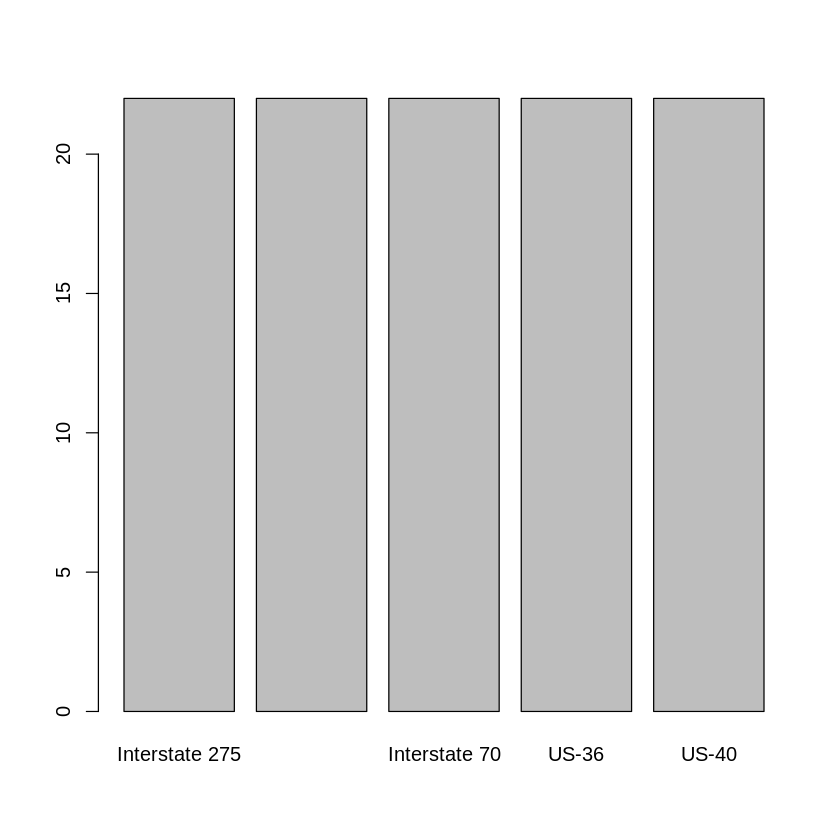

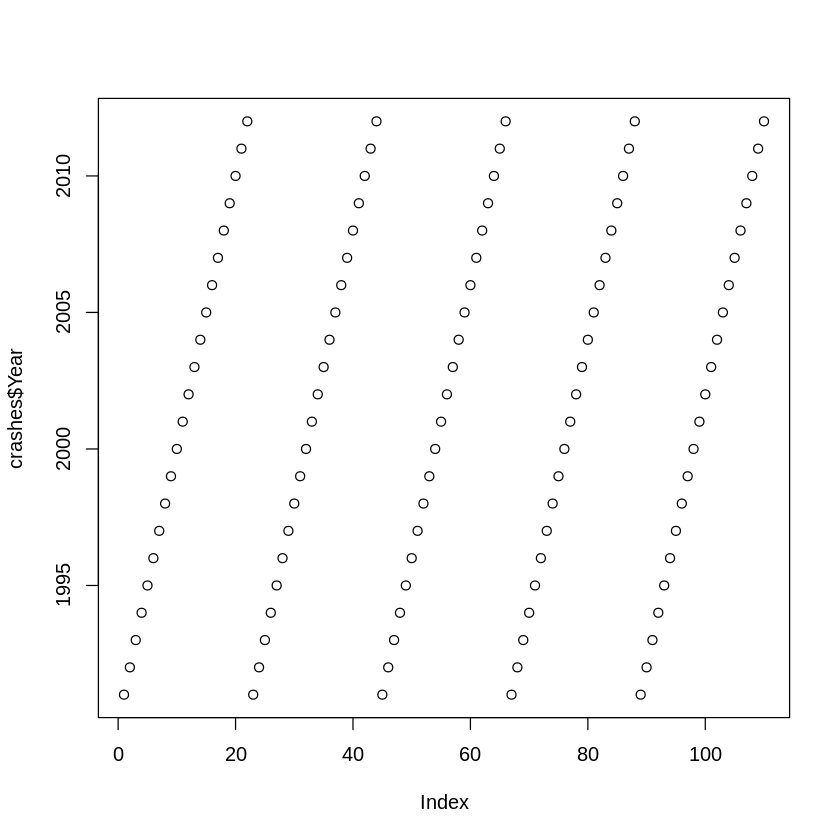

In [63]:
plot(crashes$Road)
plot(crashes$Year)


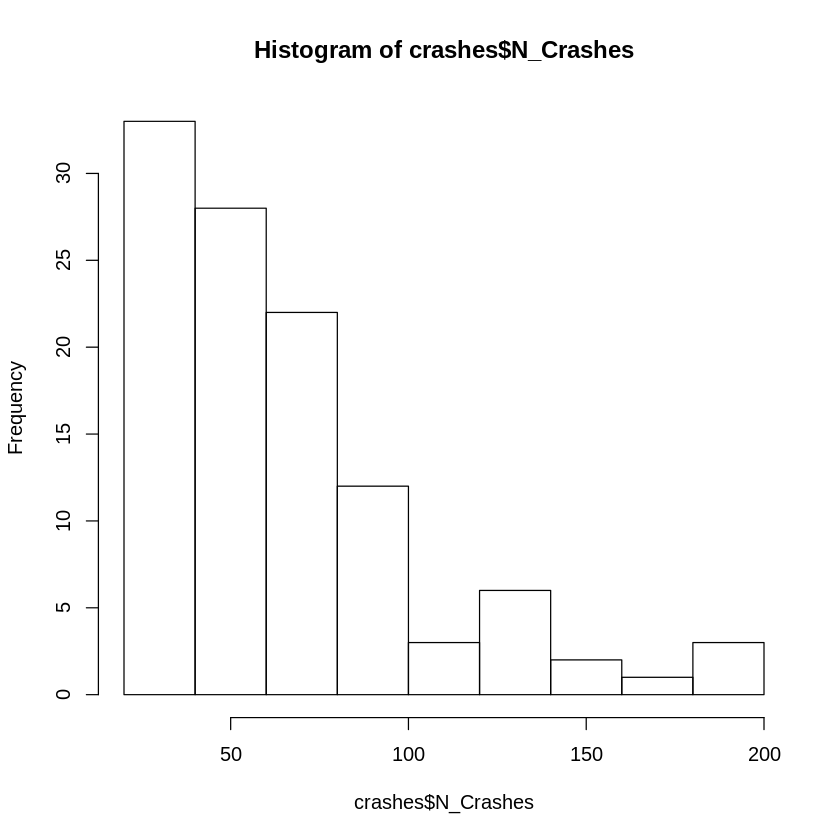

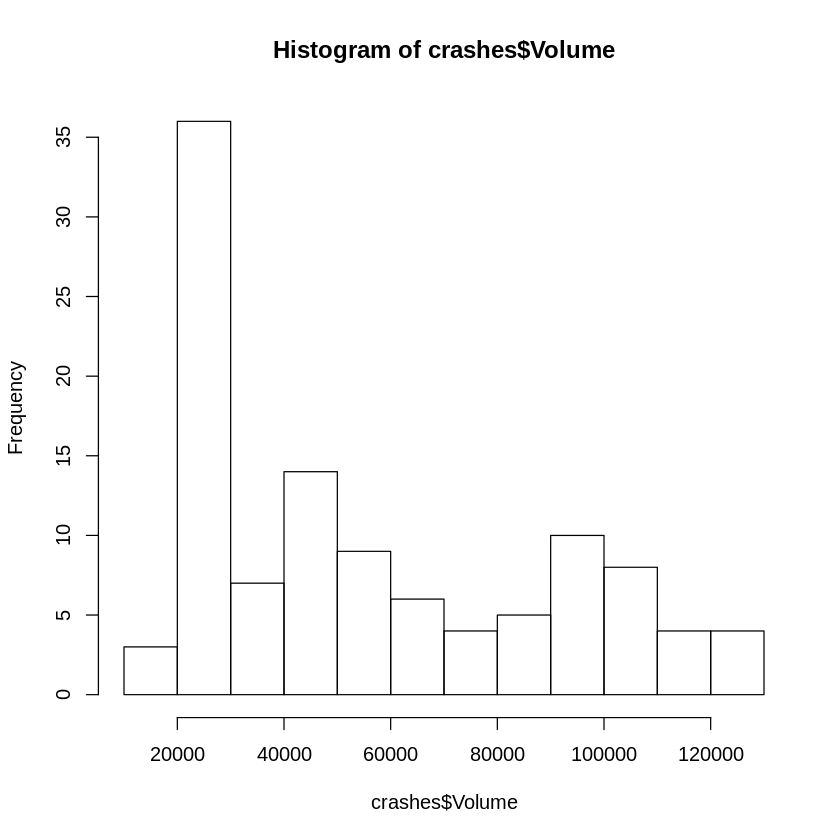

In [64]:
hist(crashes$N_Crashes)  #right skewed
hist(crashes$Volume)

In [51]:
skewness(crashes$N_Crashes)
skewness(log(crashes$N_Crashes))

[1] 1.317609

[1] 0.1408379

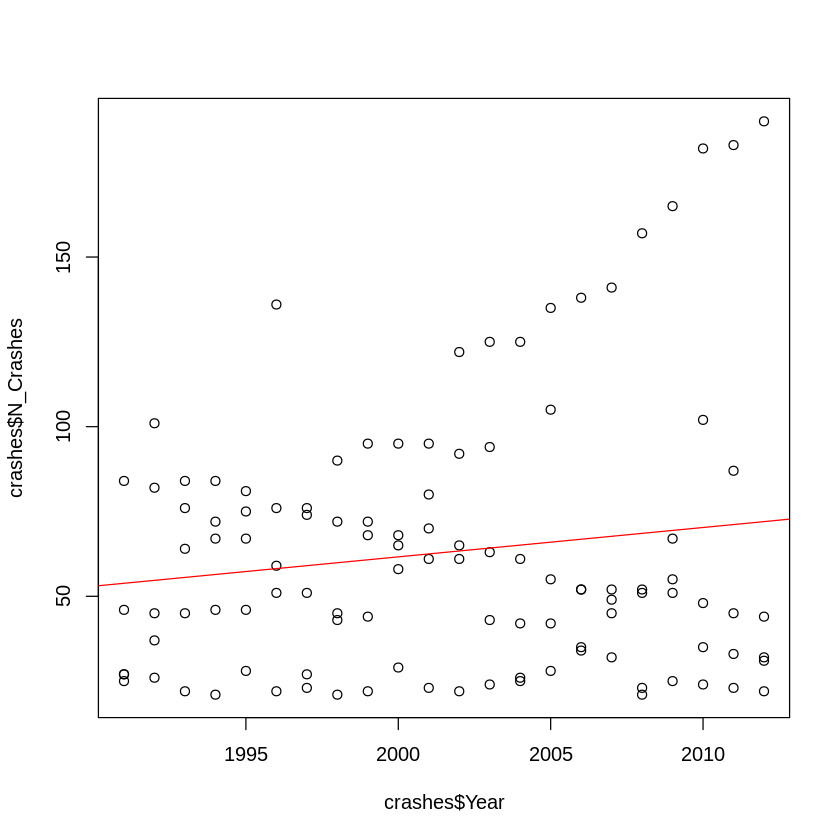

In [53]:
plot(crashes$Year,crashes$N_Crashes)
abline(lm(crashes$N_Crashes~crashes$Year), col="red")
# abline(lm(crashes$N_Crashes~crashes$Volume), col="red")


In [0]:
cor(crashes$N_Crashes,crashes$Year)

[1] 0.1426947

In [0]:
roads <- read.csv('/content/roads.csv')
head(roads)

,Road,District,Length
,<fct>,<fct>,<int>
1,Interstate 65,Greenfield,262
2,Interstate 70,Vincennes,156
3,US-36,Crawfordsville,139
4,US-40,Greenfield,150
5,US-52,Crawfordsville,172


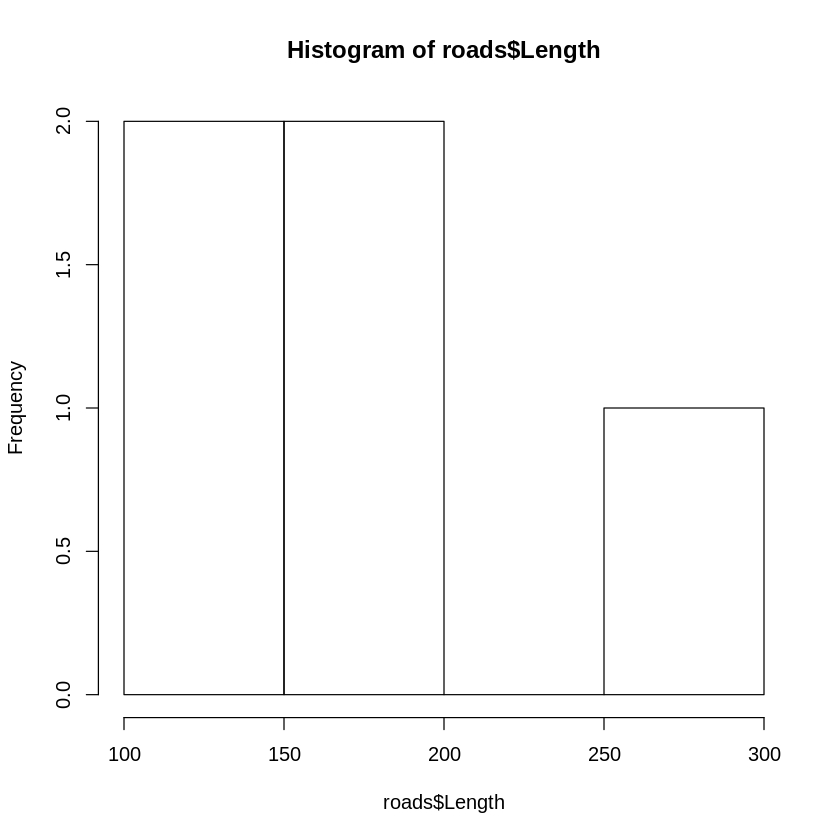

In [56]:
hist(roads$Length)

In [66]:
skewness(roads$Length)


[1] 0.9248785

##  Left join of the crash data set to the road data set based on the common variable Road.

In [0]:
joining_string <- "select crashes.*,roads.District,roads.Length from crashes left join roads on crashes.Road = roads.Road"

In [0]:
join_crashes_road <- sqldf(joining_string,stringsAsFactors = FALSE)

In [0]:
head(join_crashes_road)

,Year,Road,N_Crashes,Volume,District,Length
,<int>,<chr>,<int>,<int>,<chr>,<int>
1,1991,Interstate 65,25,40000,Greenfield,262
2,1992,Interstate 65,37,41000,Greenfield,262
3,1993,Interstate 65,45,45000,Greenfield,262
4,1994,Interstate 65,46,45600,Greenfield,262
5,1995,Interstate 65,46,49000,Greenfield,262
6,1996,Interstate 65,59,51000,Greenfield,262


In [0]:
tail(join_crashes_road)

,Year,Road,N_Crashes,Volume,District,Length
,<int>,<chr>,<int>,<int>,<chr>,<int>
105,2007,Interstate 275,32,21900,NA,NA
106,2008,Interstate 275,21,21850,NA,NA
107,2009,Interstate 275,25,22100,NA,NA
108,2010,Interstate 275,24,21500,NA,NA
109,2011,Interstate 275,23,20300,NA,NA
110,2012,Interstate 275,22,21200,NA,NA


##  Inner join of the crash data set to the road data set based on the common variable Road.

In [0]:
joining_inner <- "select crashes.*, roads.* from crashes inner join roads on crashes.Road = roads.Road"

In [0]:
inner_join_Road <- sqldf(joining_inner,stringsAsFactors = FALSE)
head(inner_join_Road)

,Year,Road,N_Crashes,Volume,Road,District,Length
,<int>,<chr>,<int>,<int>,<chr>,<fct>,<int>
1,1991,Interstate 65,25,40000,Interstate 65,Greenfield,262
2,1992,Interstate 65,37,41000,Interstate 65,Greenfield,262
3,1993,Interstate 65,45,45000,Interstate 65,Greenfield,262
4,1994,Interstate 65,46,45600,Interstate 65,Greenfield,262
5,1995,Interstate 65,46,49000,Interstate 65,Greenfield,262
6,1996,Interstate 65,59,51000,Interstate 65,Greenfield,262


In [0]:
tail(inner_join_Road)

,Year,Road,N_Crashes,Volume,Road,District,Length
,<int>,<chr>,<int>,<int>,<chr>,<fct>,<int>
83,2007,US-36,49,24000,US-36,Crawfordsville,139
84,2008,US-36,52,24500,US-36,Crawfordsville,139
85,2009,US-36,55,24700,US-36,Crawfordsville,139
86,2010,US-36,35,23000,US-36,Crawfordsville,139
87,2011,US-36,33,21000,US-36,Crawfordsville,139
88,2012,US-36,31,20500,US-36,Crawfordsville,139


## **MERGE**

In [0]:
#other attribute (all.x = TRUE or all.y = TRUE)s
crashes_merge_roads <- merge(crashes,roads,by = c("Road"))
head(crashes_merge_roads)

,Road,Year,N_Crashes,Volume,District,Length
,<fct>,<int>,<int>,<int>,<fct>,<int>
1,Interstate 65,2000,95,74000,Greenfield,262
2,Interstate 65,1997,76,52000,Greenfield,262
3,Interstate 65,1998,90,58000,Greenfield,262
4,Interstate 65,1999,95,65000,Greenfield,262
5,Interstate 65,1991,25,40000,Greenfield,262
6,Interstate 65,1992,37,41000,Greenfield,262


In [0]:
tail(crashes_merge_roads)

,Road,Year,N_Crashes,Volume,District,Length
,<fct>,<int>,<int>,<int>,<fct>,<int>
83,US-40,2003,94,55200,Greenfield,150
84,US-40,2004,25,55300,Greenfield,150
85,US-40,2009,67,65000,Greenfield,150
86,US-40,2010,102,67000,Greenfield,150
87,US-40,2011,87,67500,Greenfield,150
88,US-40,2012,32,67500,Greenfield,150


In [0]:
join_string2 <- "select
                crashes.*
              , roads.District
              , roads.Length
                from crashes
                    inner join roads
                    on crashes.Road = roads.Road
                where crashes.Road = 'US-40'"                
crashes_join_roads4 <- sqldf(join_string2,stringsAsFactors = FALSE)
head(crashes_join_roads4)

,Year,Road,N_Crashes,Volume,District,Length
,<int>,<chr>,<int>,<int>,<fct>,<int>
1,1991,US-40,46,21000,Greenfield,150
2,1992,US-40,101,21500,Greenfield,150
3,1993,US-40,76,23000,Greenfield,150
4,1994,US-40,72,21000,Greenfield,150
5,1995,US-40,75,24000,Greenfield,150
6,1996,US-40,136,23500,Greenfield,150


## **AGGREGATE FUNCTIONS**

In [0]:
group_string <- "select
                  crashes.Road
                 , avg(crashes.N_Crashes) as Mean_Crashes
                 from crashes
                    left join roads
                    on crashes.Road = roads.Road
                 group by 1"
sqldf(group_string)

Road,Mean_Crashes
<chr>,<dbl>
Interstate 275,24.95455
Interstate 65,107.81818
Interstate 70,65.18182
US-36,48.00000
US-40,68.68182


In [0]:
ddply(crashes_merge_roads,
      c("Road"),
      function(X) data.frame(Mean_Crashes = mean(X$N_Crashes),
                             Q1_Crashes = quantile(X$N_Crashes, 0.25),
                             Q3_Crashes = quantile(X$N_Crashes, 0.75),
                             Median_Crashes = quantile(X$N_Crashes, 0.50))
      )

Road,Mean_Crashes,Q1_Crashes,Q3_Crashes,Median_Crashes
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Interstate 65,107.81818,63.25,140.25,108.5
Interstate 70,65.18182,52.00,75.50,66.5
US-36,48.00000,42.00,57.25,47.0
US-40,68.68182,45.25,90.75,70.0
